## 今日の演習

今日は先週の復習＋αと各自の「まとめ資料」作成

瀧川は今日は14:00の飛行機で出張なので11:30くらいには出ます。いつものミニレポートはTAが回収するので記入して前に提出してから解散してください。

## practice05

先週のpractice05.ipynbはみなさんがダウンロードしたであろう新しいAnacondaに入っているpandasでは動かない古い書き方になっていました。エラーが出て戸惑った人スミマセン。まあ拡張ライブラリはこういうこともあります。

ということで現在アップロードされているpractice05は修正してあるので、以下をこなした後に再度チェックして見てください！

## スライスの復習

まずはpandasをimportします。名前が長いと入力が面倒くさいので「pd」で省略できるようasしておきます。pandas.hogehogeがpd.hogehogeと書けるだけです。分からない人は「モジュール」のところを復習してください。

In [1]:
import pandas as pd

まずはリストのリスト(配列の配列)を定義しましょう。Excelで表データを作り、「CSV」形式で保存してから、それをpd.read_csvで読むとかでもいいです。

In [5]:
m = [[1, 2, 3],
     [40, 20, 10]]

In [6]:
m

[[1, 2, 3], [40, 20, 10]]

これをpandasの表データ(DataFrame)にします。

In [77]:
df = pd.DataFrame(m)

In [78]:
df

,0,1,2
0,1,2,3
1,40,20,10


配列のスライスと同じようにして部分を切り取ることができます。配列では

In [12]:
a = [1, 3, 5, 7, 8, 9]

In [13]:
a[0]

1

In [14]:
a[0:3]

[1, 3, 5]

In [15]:
a[1:3]

[3, 5]

In [16]:
a[3:5]

[7, 8]

In [17]:
a[:]

[1, 3, 5, 7, 8, 9]

In [19]:
a[-1]

9

In [20]:
a[-2:]

[8, 9]

こんな感じで部分を取り出せましたね。忘れている人は「配列」のところを復習してください。

In [21]:
df

,0,1,2
0,1,2,3
1,40,20,10


pandasの表をこの形式で切り取るにはilocを使いましょう。

In [62]:
df.iloc[0, :]

retsu-1    1
retsu-2    2
retsu-3    3
Name: gyou-1, dtype: int64

In [24]:
df.iloc[0, 2]

3

In [26]:
df.iloc[1, :]

0    40
1    20
2    10
Name: 1, dtype: int64

In [27]:
df.iloc[:, 2]

0     3
1    10
Name: 2, dtype: int64

In [28]:
df

,0,1,2
0,1,2,3
1,40,20,10


表に列名をつけて見ましょう。列は英語でカラム(column)なので、columnsで指定します。

In [29]:
df.columns = ['retsu-1', 'retsu-2', 'retsu-3']

In [30]:
df

,retsu-1,retsu-2,retsu-3
0,1,2,3
1,40,20,10


行名をつけてみましょう。行は英語でロウ(row)なのですが、pandasではindexで指定します。

In [31]:
df.index = ['gyou-1', 'gyou-2']

In [32]:
df

,retsu-1,retsu-2,retsu-3
gyou-1,1,2,3
gyou-2,40,20,10


名前をつけておくと列を名前で参照することができます。この方が、間違いが減りそうですね。

In [36]:
df['retsu-3']

gyou-1     3
gyou-2    10
Name: retsu-3, dtype: int64

行を名前で参照するときは、ilocではなく、locを使いましょう。

In [37]:
df.loc['gyou-2', 'retsu-3']

10

In [38]:
df.loc['gyou-2', :]

retsu-1    40
retsu-2    20
retsu-3    10
Name: gyou-2, dtype: int64

In [39]:
df.loc[:, 'retsu-1']

gyou-1     1
gyou-2    40
Name: retsu-1, dtype: int64

In [40]:
df.columns

Index(['retsu-1', 'retsu-2', 'retsu-3'], dtype='object')

In [41]:
df.index

Index(['gyou-1', 'gyou-2'], dtype='object')

In [63]:
df

,retsu-1,retsu-2,retsu-3
gyou-1,1,2,3
gyou-2,40,20,10


さて、それでは列の平均値を計算して見ましょう。axis=0で列方向、axis=1で行方向に平均(mean)や総和(sum)の計算ができます。

In [67]:
df.mean(axis=0)

retsu-1    20.5
retsu-2    11.0
retsu-3     6.5
dtype: float64

In [68]:
df.mean(axis=1)

gyou-1     2.000000
gyou-2    23.333333
dtype: float64

In [69]:
df.sum(axis=0)

retsu-1    41
retsu-2    22
retsu-3    13
dtype: int64

In [70]:
df.sum(axis=1)

gyou-1     6
gyou-2    70
dtype: int64

これらの行や列を加えて見ましょう。

In [79]:
df

,0,1,2
0,1,2,3
1,40,20,10


In [80]:
df.loc['sum'] = df.sum(axis=0)

In [81]:
df

,0,1,2
0,1,2,3
1,40,20,10
sum,41,22,13


In [82]:
df['sum'] = df.sum(axis=1)

In [83]:
df

,0,1,2,sum
0,1,2,3,6
1,40,20,10,70
sum,41,22,13,76


ファイルに保存して見ましょう。

In [84]:
df.to_csv('mydata.csv')

これで「mydata.csv」がこのipynbと同じフォルダにできているはずなので、ダブルクリックしてExcelで中身を確認して見ましょう。

pandasについては、適当に検索したら、色々見つかると思いますが、例えば、以下が公式のものです。データ処理や統計解析、あるいは、AIや機械学習に関心がある人はデータの取り扱いに慣れる必要があるので取り組んでみると良いと思います！(英語の勉強を兼ねて?)

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

## 表のデータを可視化

可視化を担当する拡張ライブラリmatplotlibをimportして、このJupyter notebookの中でグラフが見れるように呼び出しておきましょう。

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

単純な折れ線グラフを描いて見ましょう。

In [50]:
x = [1, 2, 5, 6, 9, 14, 2, 1, 0]

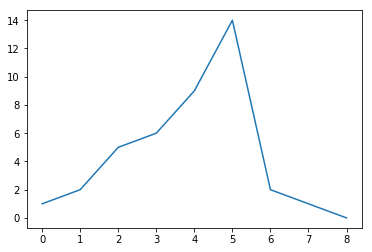

In [52]:
plt.plot(x)
plt.show()

点も加えて見ましょう。点は'o'を加えるだけです。

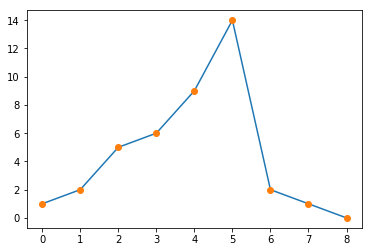

In [53]:
plt.plot(x) # 線が引かれる
plt.plot(x, 'o') # 点がプロットされる
plt.show()

軸ラベルを振って見ましょう。x軸に「週」、y軸に「獲得ポイント」としましょう。

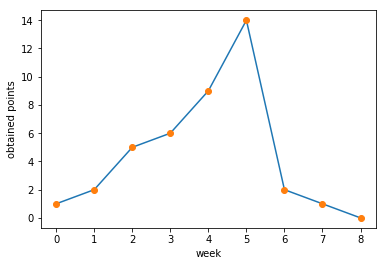

In [54]:
plt.plot(x)
plt.plot(x, 'o')
plt.xlabel('week')
plt.ylabel('obtained points')
plt.show()

同じデータを棒グラフで書いて見ましょう。棒グラフは棒の位置と高さの二つのリストを使います。位置は等間隔に [0, 1, 2, 3, 4, ..., 8]として見ましょう。

In [59]:
points = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # (range(len(x)))でも可

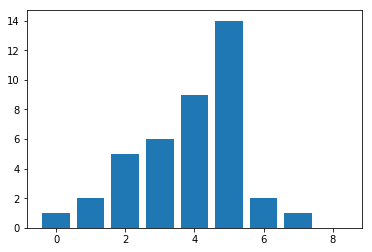

In [61]:
plt.bar(points, x)
plt.show()

下記のmatplotlibの公式の入門(英語だが)をみて、少し自分なりにいくつかグラフを作って見ましょう！

https://matplotlib.org/tutorials/introductory/pyplot.html

以上が分かってきたら、自分でデータをExcelで作って(もしくはどこかからデータを入手して)、CSV形式で保存、pandasのread_csvで読み込んで、集計したり可視化したりしてみる、という流れも少し理解できるのではないでしょうか！

## 

In [89]:
df.style.highlight_max()

,0,1,2,sum
0,1,2,3,6
1,40,20,10,70
sum,41,22,13,76


## numpyを使う

数値計算などより柔軟に扱うためnumpyというライブラリを読み込みます。なお、データサイエンスやAI分野でpythonを使う場合、この３つのライブラリ「numpy」「pandas」「matplotlib」は非常によくつかう御三家です。

In [97]:
import numpy as np

0-1の乱数で 5 x 6 の表を作ってみましょう。

In [101]:
m = np.random.random( (5, 6))
m

array([[0.45445478, 0.54319951, 0.35031963, 0.45432943, 0.56299416,
        0.57091919],
       [0.77263717, 0.60022413, 0.2020584 , 0.90182261, 0.01995216,
        0.20417182],
       [0.87654762, 0.8322917 , 0.96418857, 0.12080848, 0.91759093,
        0.73825651],
       [0.20876672, 0.68317563, 0.3186767 , 0.19482618, 0.62293063,
        0.1661353 ],
       [0.8721996 , 0.88248626, 0.99791255, 0.62202052, 0.43472665,
        0.43287534]])

pandasの表にします。

In [102]:
df2 = pd.DataFrame(m)

In [103]:
df2

,0,1,2,3,4,5
0,0.454455,0.543200,0.350320,0.454329,0.562994,0.570919
1,0.772637,0.600224,0.202058,0.901823,0.019952,0.204172
2,0.876548,0.832292,0.964189,0.120808,0.917591,0.738257
3,0.208767,0.683176,0.318677,0.194826,0.622931,0.166135
4,0.872200,0.882486,0.997913,0.622021,0.434727,0.432875


0.5より大きいところを赤字にして見ましょう。

In [108]:
def highlight(val):
    if val > 0.5:
        return 'color: red'
    else:
        return 'color: black'

上の関数を各マスに適用(apply)するにはstyle.applymapを使います。

In [110]:
df2.style.applymap(highlight)

,0,1,2,3,4,5
0,0.454455,0.5432,0.35032,0.454329,0.562994,0.570919
1,0.772637,0.600224,0.202058,0.901823,0.0199522,0.204172
2,0.876548,0.832292,0.964189,0.120808,0.917591,0.738257
3,0.208767,0.683176,0.318677,0.194826,0.622931,0.166135
4,0.8722,0.882486,0.997913,0.622021,0.434727,0.432875


次は0.3より小さいマスを黄色でハイライトしてみる例です。

In [113]:
def highlight(val):
    if val < 0.3:
        return 'background-color: yellow'
    else:
        return ''

In [114]:
df2.style.applymap(highlight)

,0,1,2,3,4,5
0,0.454455,0.5432,0.35032,0.454329,0.562994,0.570919
1,0.772637,0.600224,0.202058,0.901823,0.0199522,0.204172
2,0.876548,0.832292,0.964189,0.120808,0.917591,0.738257
3,0.208767,0.683176,0.318677,0.194826,0.622931,0.166135
4,0.8722,0.882486,0.997913,0.622021,0.434727,0.432875


最大値を計算して見ましょう。

pandasの表を.valuesでnumpy配列として取り出します。

In [124]:
df.values

array([[ 1,  2,  3,  6],
       [40, 20, 10, 70],
       [41, 22, 13, 76]])

flatten()でこれを1次元にぺしゃっとたいらにします。

In [126]:
df.values.flatten()

array([ 1,  2,  3,  6, 40, 20, 10, 70, 41, 22, 13, 76])

最大値は...

In [127]:
np.max(df.values.flatten())

76

In [129]:
def highlight(val):
    if val == 76:
        return 'background-color: yellow'
    else:
        return ''

In [131]:
df.style.applymap(highlight)

,0,1,2,sum
0,1,2,3,6
1,40,20,10,70
sum,41,22,13,76


参考）いちいちdefするのは面倒なので、名前をつけない関数(無名関数)というのを作ることもできます。

In [133]:
df.style.applymap(lambda s: 'color: blue' if s == 20 else '')

,0,1,2,sum
0,1,2,3,6
1,40,20,10,70
sum,41,22,13,76


*ここまで来たら再度practice05.ipynbをチェックして見てください！*